# Plex 2023: A Year in Review 

In this comprehensive Notebook, we delve into the evolving landscape of media consumption in 2023 from a homebrew Plex Server. Through a series of meticulously designed visualizations, the notebook presents an insightful exploration of how users engage with different media types and platforms:

* Total Screen Time and Monthly Media Habits
* User Preferences in Content Type and Movie Genres
* Spotlight on the Most Played TV Shows and Movies
* Navigating Hours Spent Across Viewing Platforms

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

In [2]:
# import the csv with the completed data analysis and cleaning 

finalCSV = r"https://raw.githubusercontent.com/nehrou/plex_analysis_project/main/plexHistory.csv"

plexDF = pd.read_csv(finalCSV,index_col=False,)


# Convert the date columns from object to datetime
plexDF['Originally Available'] = pd.to_datetime(plexDF['Originally Available'], errors='coerce')

plexDF['Viewed At'] = pd.to_datetime(plexDF['Viewed At'], errors='coerce')

# plexDF.head(5)

In [3]:
# Zone in on 2023 data for the visualization 

plex2023 = plexDF[plexDF['Viewed At'].dt.year == 2023]

### 2023 A Year in View - Total Screen Time and Monthly Media Habits

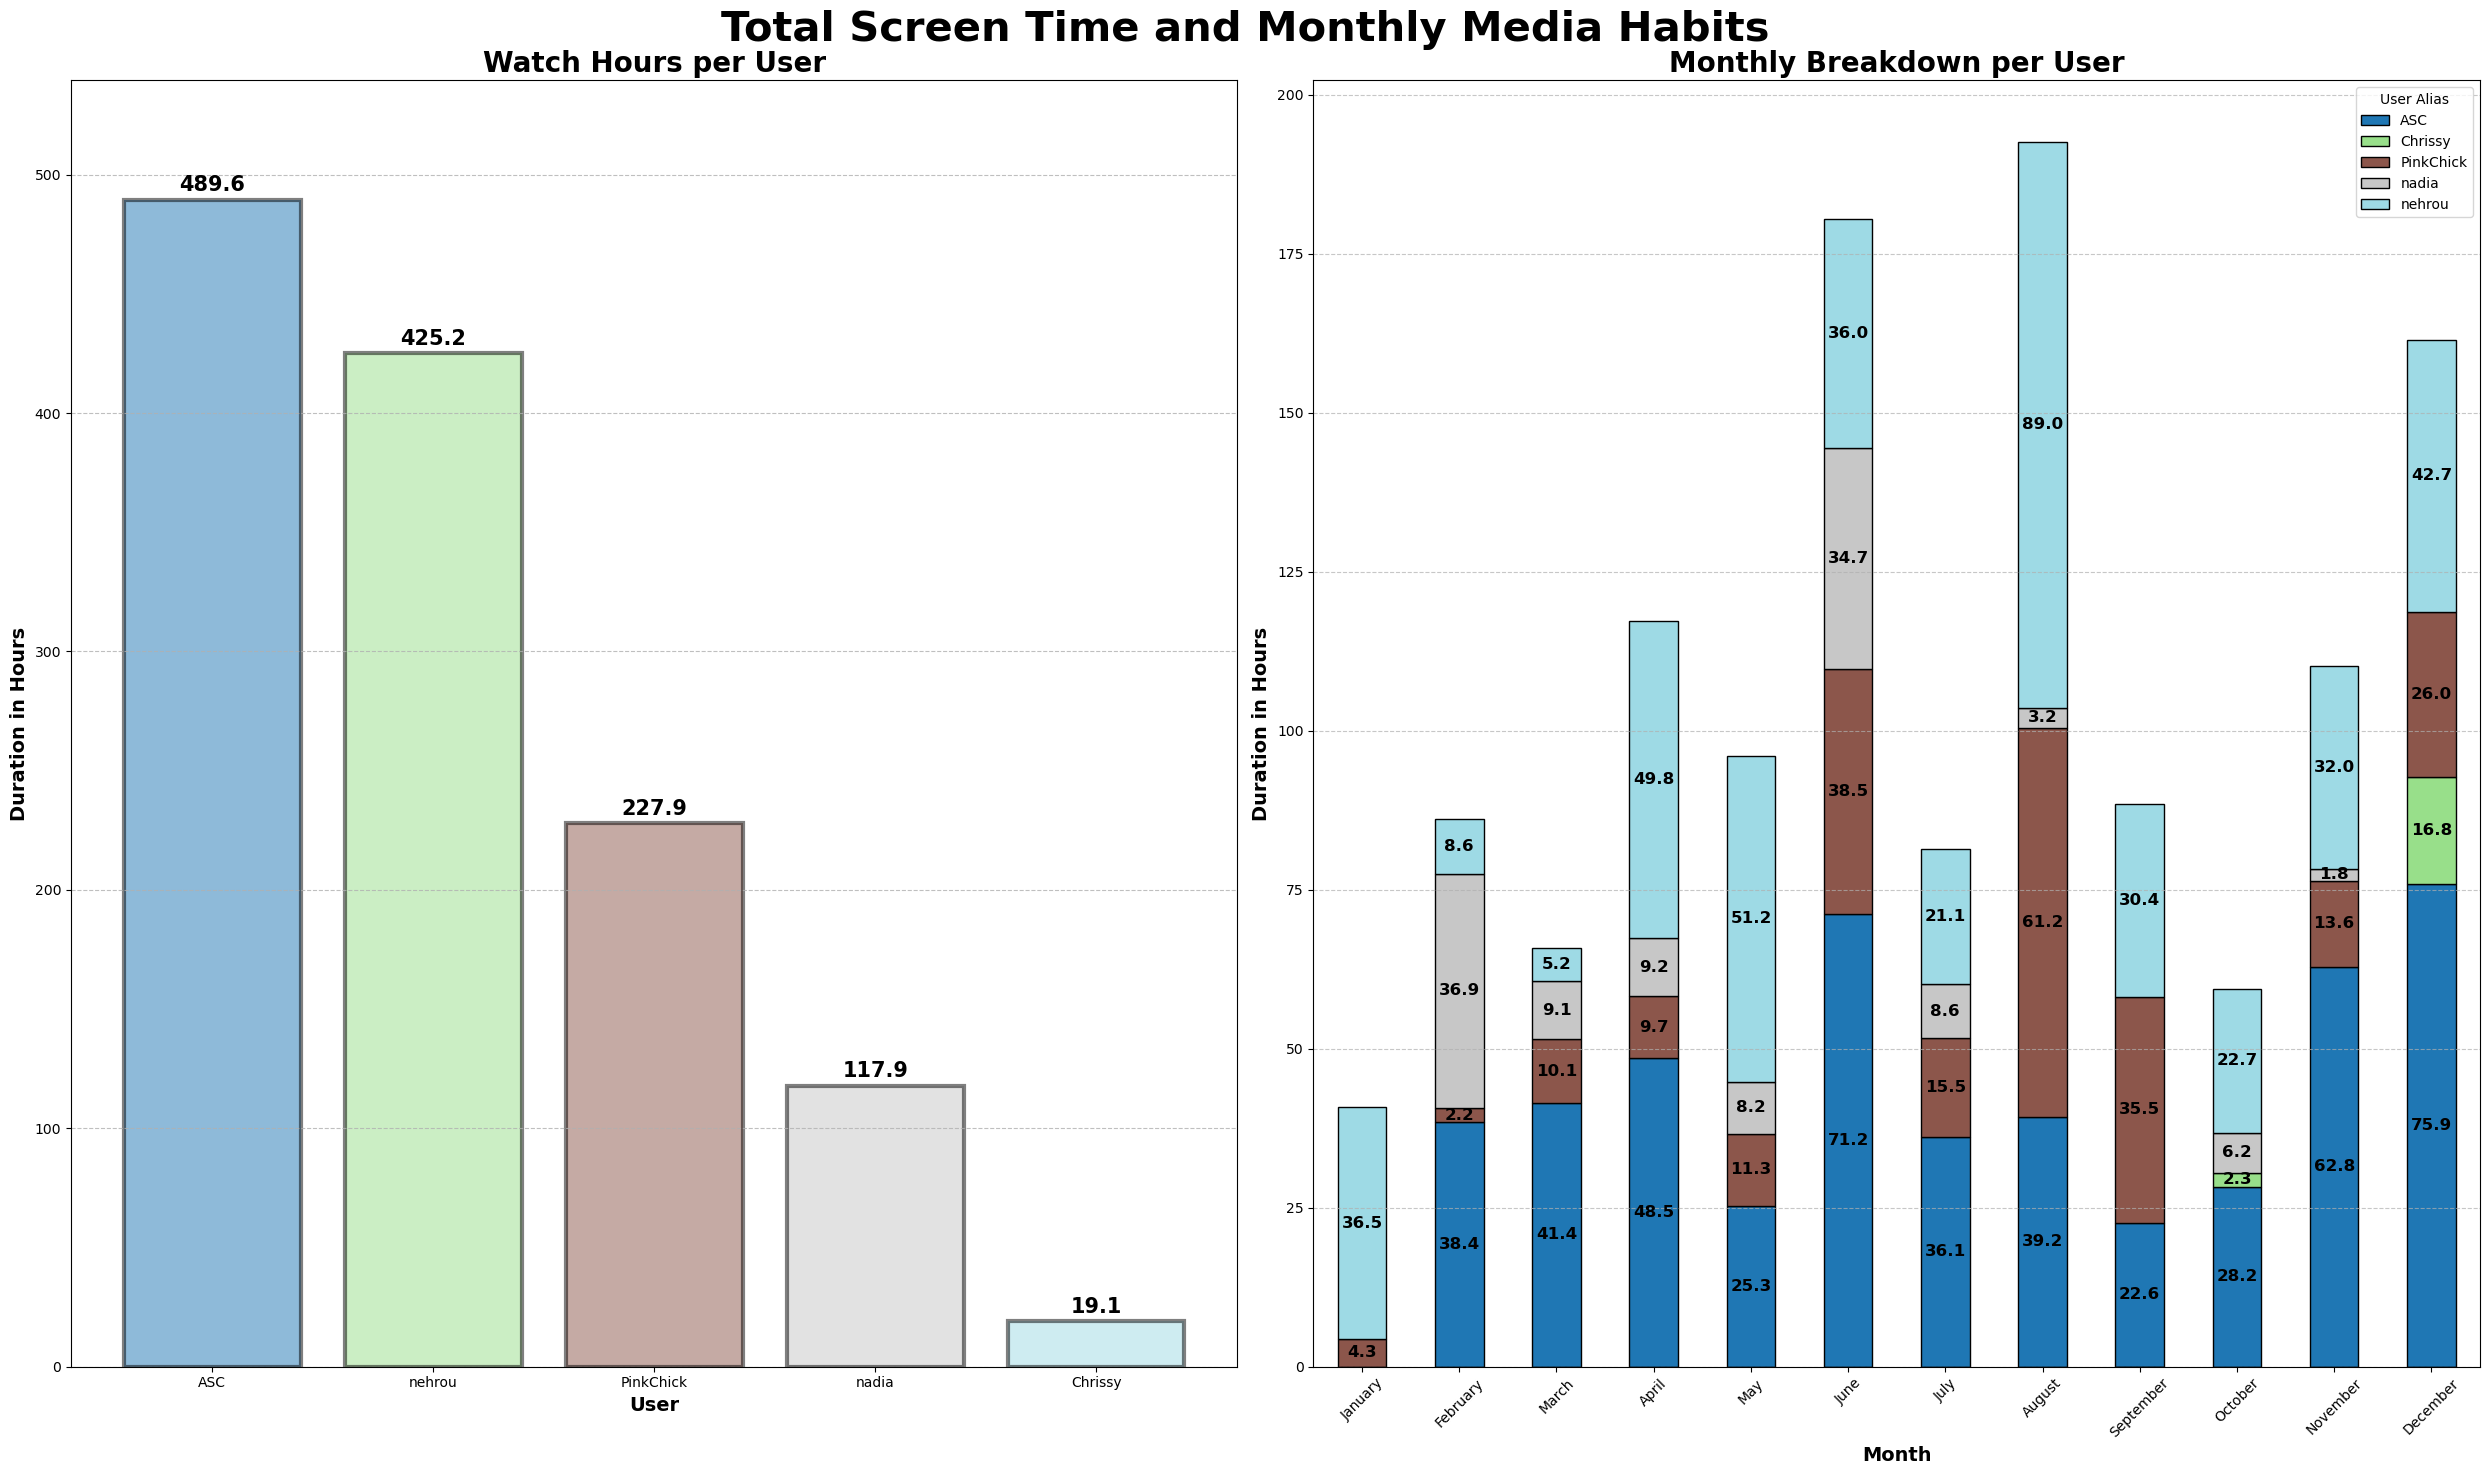

In [4]:
userDuration = plex2023.groupby('User Alias')['Duration_Hrs'].sum().reset_index().sort_values('Duration_Hrs',ascending=False)

plex2023['Month'] = plex2023['Viewed At'].dt.month_name()

userMonth = plex2023.groupby(['User Alias', 'Month'])['Duration_Hrs'].sum().reset_index()

userMonth = userMonth.pivot(index='Month', columns='User Alias', values='Duration_Hrs').fillna(0)

months_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

userMonth = userMonth.reindex(months_order)



fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15) )

fig.suptitle('Total Screen Time and Monthly Media Habits', fontsize=30, fontweight='bold' )
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(userDuration['User Alias'])))

# Plotting 'User' vs 'Hours'
userDurationBar = axes[0].bar(userDuration['User Alias'], userDuration['Duration_Hrs'], color= colors,edgecolor='black',alpha=0.5, linewidth=3)
axes[0].grid(True, linestyle='--', alpha=0.8, axis = 'y', which='both')
axes[0].set_xlabel('User', fontsize=14, fontweight='bold' )
axes[0].set_ylabel('Duration in Hours', fontsize=14, fontweight='bold' )
axes[0].set_title('Watch Hours per User', fontsize=20, fontweight='bold' )
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_ylim(0, userDuration['Duration_Hrs'].max() + 50)  # Adding some space above the bars



# Adding value labels on top of the bars
for bar in userDurationBar:
    height = bar.get_height()
    axes[0].annotate(f'{height:.1f}', 
                     (bar.get_x() + bar.get_width() / 2, height), 
                     ha='center', va='bottom', 
                     xytext=(0, 3), textcoords='offset points', fontsize=15, fontweight = 'bold')

# Plotting 'User' vs 'Hours'
userMonthBar = userMonth.plot(kind='bar', stacked=True, ax=axes[1],colormap='tab20', edgecolor='black')
axes[1].grid(True, linestyle='--', alpha=0.7, which= 'both', axis = 'y')
axes[1].set_xlabel('Month', fontsize=14, fontweight='bold' )
axes[1].set_ylabel('Duration in Hours', fontsize=14, fontweight='bold' )
axes[1].set_title('Monthly Breakdown per User', fontsize=20, fontweight='bold' )
axes[1].tick_params(axis='x', rotation=45)

# Adding total hours labels for each month
for container  in axes[1].containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in container]
    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold')

plt.tight_layout()  
plt.show()

### Streaming Spectrum: User Preferences in Content Type and Movie Genres

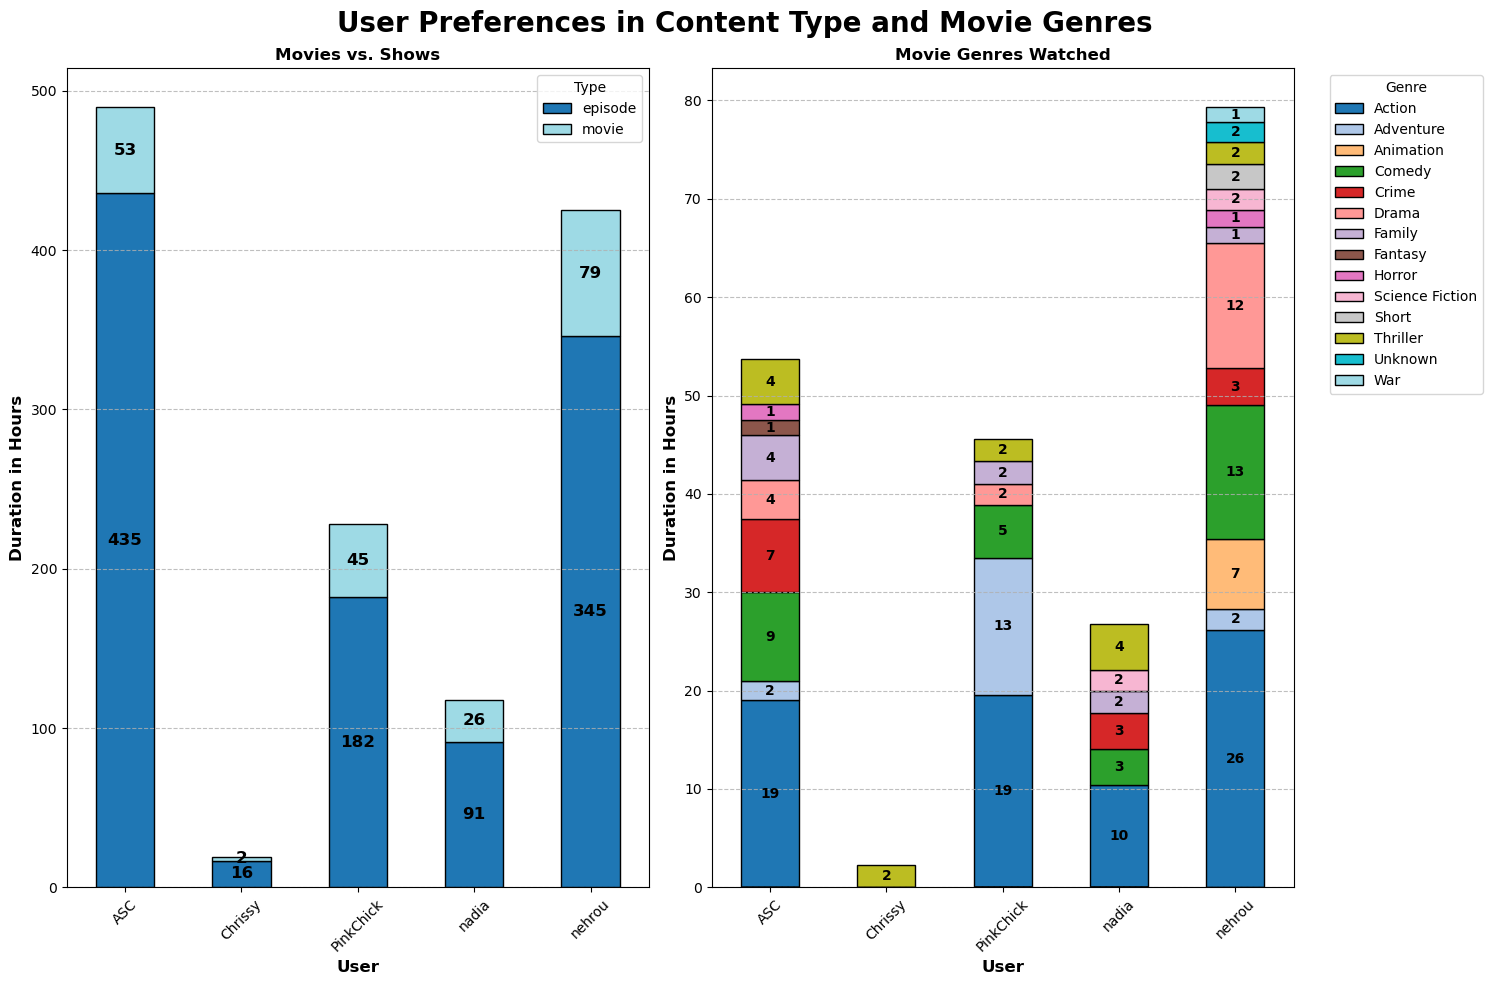

In [5]:
mediaType = plex2023.groupby(['User Alias', 'Type'])['Duration_Hrs'].sum().unstack(fill_value=0)    #Get the type of media consumed by users by the hours watched

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10) )

fig.suptitle('User Preferences in Content Type and Movie Genres', fontsize=20, fontweight='bold' )


mediaTypeBar = mediaType.plot(kind='bar', stacked=True, ax=axes[0],colormap='tab20', edgecolor='black')
axes[0].grid(True, linestyle='--', alpha=0.8, axis = 'y', which='both')
axes[0].set_xlabel('User', fontsize=12, fontweight='bold' )
axes[0].set_ylabel('Duration in Hours', fontsize=12, fontweight='bold' )
axes[0].set_title('Movies vs. Shows', fontsize=12, fontweight='bold' )
axes[0].tick_params(axis='x', rotation=45)


# Adding data labels
for container  in axes[0].containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
    axes[0].bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold')




plexMovies = plex2023[plex2023['Type']== 'movie']   # Get the only the movies from the dataset to pull their genres 

genrePlayed = plexMovies.groupby(['User Alias', 'Genre'])['Duration_Hrs'].sum().unstack(fill_value=0)


genrePlayedBar = genrePlayed.plot(kind='bar', stacked=True, ax=axes[1],colormap='tab20', edgecolor='black')
axes[1].grid(True, linestyle='--', alpha=0.8, axis = 'y', which='both')
axes[1].set_xlabel('User', fontsize=12, fontweight='bold' )
axes[1].set_ylabel('Duration in Hours', fontsize=12, fontweight='bold' )
axes[1].set_title('Movie Genres Watched', fontsize=12, fontweight='bold' )
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

for container  in axes[1].containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=10, fontweight='bold')


# plt.subplots_adjust(top=5, hspace=5)  # Adjust the top margin and the horizontal space between plots

plt.tight_layout()
plt.show()

### Screen Favorites: Spotlight on the Most Played TV Shows and Movies

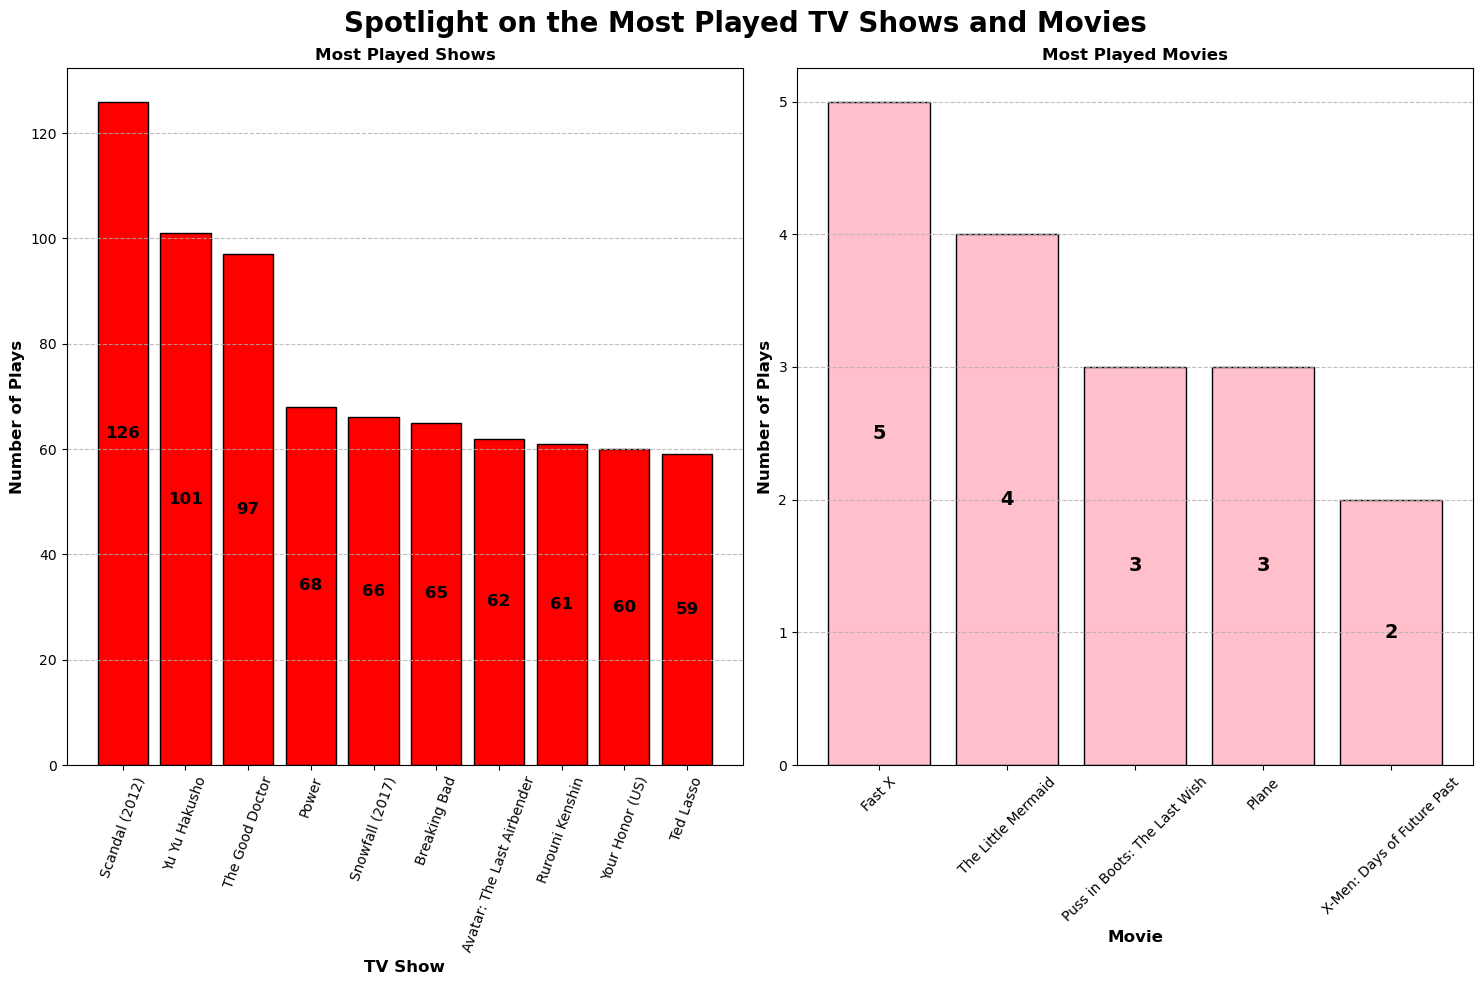

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10) )

fig.suptitle('Spotlight on the Most Played TV Shows and Movies', fontsize=20, fontweight='bold' )

mostWatchedMovie = plexMovies.groupby(['Title', 'Type']).size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(5)

plexShows = plex2023[plex2023['Type']== 'episode'] 

mostWatchedShow = plexShows.groupby(['Series Title', 'Type']).size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(10)

mostWatchedShow.rename(columns={'Series Title': 'Title'}, inplace=True)


genrePlayedBar =  axes[0].bar (mostWatchedShow['Title'] , mostWatchedShow['Count'] , edgecolor='black', color = 'red')
axes[0].grid(True, linestyle='--', alpha=0.8, axis = 'y', which='both')
axes[0].set_xlabel('TV Show', fontsize=12, fontweight='bold' )
axes[0].set_ylabel('Number of Plays', fontsize=12, fontweight='bold' )
axes[0].set_title('Most Played Shows', fontsize=12, fontweight='bold' )
axes[0].tick_params(axis='x', rotation=70)

for container  in axes[0].containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
    axes[0].bar_label(container, labels=labels, label_type='center', fontsize=12, fontweight='bold')

genrePlayedBar =  axes[1].bar (mostWatchedMovie['Title'] , mostWatchedMovie['Count'] , edgecolor='black', color = 'pink')
axes[1].grid(True, linestyle='--', alpha=0.8, axis = 'y', which='both')
axes[1].set_xlabel('Movie', fontsize=12, fontweight='bold' )
axes[1].set_ylabel('Number of Plays', fontsize=12, fontweight='bold' )
axes[1].set_title('Most Played Movies', fontsize=12, fontweight='bold' )
axes[1].tick_params(axis='x', rotation=45)

for container in axes[1].containers:
    labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in container]
    axes[1].bar_label(container, labels=labels, label_type='center', fontsize=14, fontweight='bold')

plt.subplots_adjust(top=5, hspace=5)  # Adjust the top margin and the horizontal space between plots

plt.tight_layout()
plt.show()

### Device Dynamics: Navigating Hours Spent Across Viewing Platforms

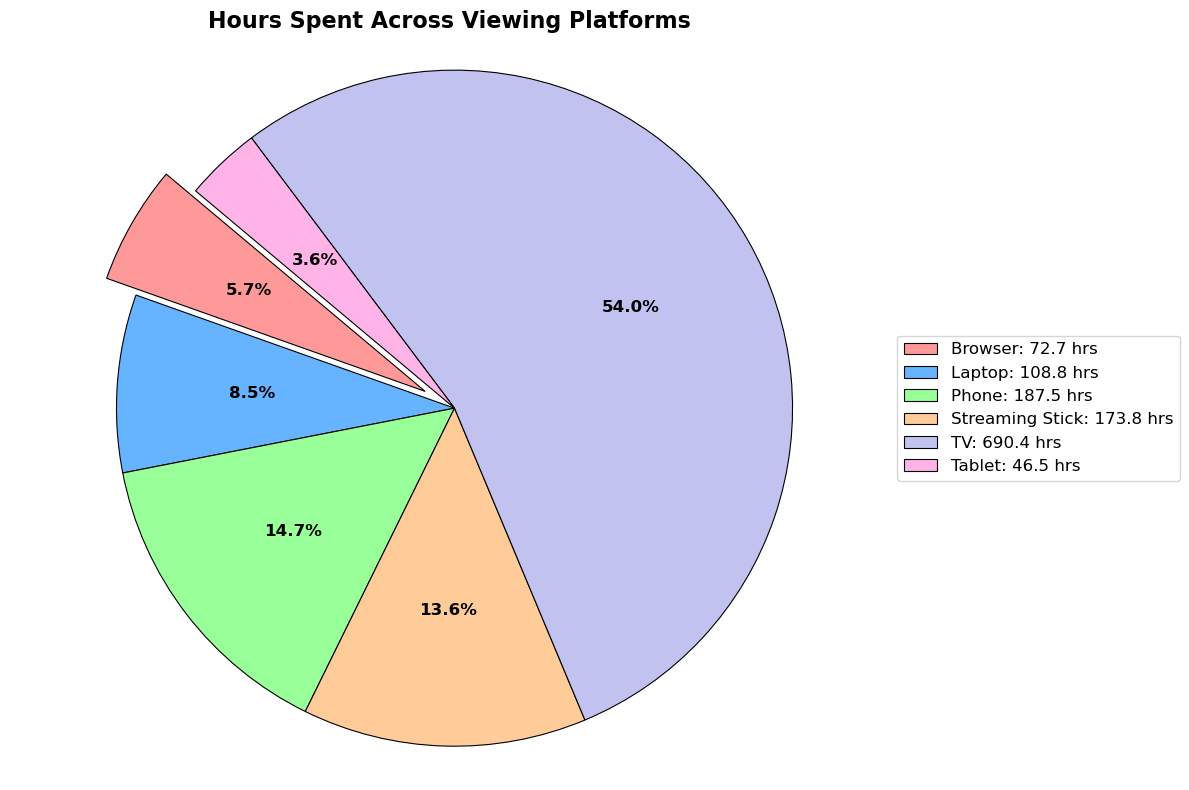

In [7]:
devices = plex2023.groupby(['Device'])['Duration_Hrs'].sum()

explode_values = (0.1, 0, 0, 0, 0, 0) 

# Define the colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6']

# Function for the formatting of labels on pie chart 
def autopct_format_only_pct(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%'.format(p=pct)
    return my_format



plt.figure(figsize=(12, 8))
devices.plot(
    kind='pie',
    labels=None, 
    autopct=autopct_format_only_pct(devices),
    startangle=140,
    explode=explode_values,
    colors=colors,
    wedgeprops={'linewidth': 0.8, 'edgecolor': 'black'},
    textprops={'fontsize': 12, 'fontweight':'bold'} 
)
plt.title('Hours Spent Across Viewing Platforms', fontsize=16, fontweight='bold')
plt.legend(
    labels=[f'{device}: {hours:.1f} hrs' for device, hours in devices.items()],
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)
plt.ylabel('')  
plt.axis('equal') 

plt.tight_layout()
plt.show()